**Trained Doc2Vec on 20K documents**

In [ ]:
!pip install pycaret

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 481.8/481.8 kB 13.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 11.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.1/16.1 MB 56.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 63.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.8/43.8 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.8/105.8 kB 13.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.0/150.0 kB 17.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.0/298.0 kB 21.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.4/46.4 kB 5.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [ ]:
import nltk
import gensim
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from nltk.tokenize import word_tokenize
nltk.download('punkt')
import pycaret
import numpy as np
import pandas as pd
#For Classification
from pycaret.classification import *

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


**Toy example**

In [ ]:
data = ["I love machine learning. Its awesome.",
        "I love coding in python",
        "I love building chatbots",
        "they chat amagingly well"]

#data = [ word_tokenize(doc) for doc in data]

data

data_for_training = [TaggedDocument(words=word_tokenize(_d.lower()), tags=[str(i)]) for i, _d in enumerate(data)]
data_for_training

[TaggedDocument(words=['i', 'love', 'machine', 'learning', '.', 'its', 'awesome', '.'], tags=['0']),
 TaggedDocument(words=['i', 'love', 'coding', 'in', 'python'], tags=['1']),
 TaggedDocument(words=['i', 'love', 'building', 'chatbots'], tags=['2']),
 TaggedDocument(words=['they', 'chat', 'amagingly', 'well'], tags=['3'])]

In [ ]:
model = gensim.models.doc2vec.Doc2Vec(vector_size=40, min_count=2, epochs=30)

In [ ]:
model.build_vocab(data_for_training)

In [ ]:
model.train(data_for_training, total_examples=model.corpus_count, epochs=model.epochs)

In [ ]:
print(model.infer_vector(['have', 'you', 'learned', 'python', 'yet']))

[ 1.0847539e-03  1.2452485e-02 -3.4781187e-03 -3.4867718e-03
 -5.8859475e-03 -7.6777944e-03 -1.2067376e-02  7.4244691e-03
 -9.2927199e-03  9.5936181e-03 -7.6156408e-03 -5.3175292e-03
 -1.1511439e-02  1.7411992e-03  7.1468563e-03  6.6722035e-03
  5.6314794e-03 -5.9129624e-03 -7.8120204e-03  6.6567226e-03
  1.9538298e-03 -4.6915113e-04 -7.2716924e-05  4.0942356e-03
 -1.6048856e-03 -1.0991240e-02 -1.2290077e-02  7.7095034e-04
 -7.3310346e-03 -5.4001347e-03 -1.3526529e-03 -4.7381357e-03
 -1.0219531e-02  7.7741789e-03 -4.3537392e-04  6.1310111e-03
 -5.6662699e-03  1.1984929e-03 -9.0926765e-03  1.0695972e-02]


**Amazon reviews example**

In [ ]:
df_train = pd.read_csv('/content/drive/MyDrive/CapstoneData/amazon_review_polarity_csv/train_clean_20000.csv')
df_test = pd.read_csv('/content/drive/MyDrive/CapstoneData/amazon_review_polarity_csv/test_clean_4000.csv')

In [ ]:
df_train.head()

,label,title+review_clean
0,1,stun even nongamer sound track beautiful paint...
1,1,best soundtrack ever anything read lot review ...
2,1,amaze soundtrack favorite music time hand inte...
3,1,excellent soundtrack truly like soundtrack enj...
4,1,remember pull jaw floor hear play game know di...


In [ ]:
data_for_training = [TaggedDocument(words=word_tokenize(_d), tags=[str(i)]) for i, _d in enumerate(df_train['title+review_clean'].fillna('').values.tolist())]
data_for_testing = [TaggedDocument(words=word_tokenize(_d), tags=[str(i)]) for i, _d in enumerate(df_test['title+review_clean'].fillna('').values.tolist())]
data_for_training[0]

TaggedDocument(words=['stun', 'even', 'nongamer', 'sound', 'track', 'beautiful', 'paint', 'senery', 'mind', 'well', 'would', 'recomend', 'even', 'people', 'hate', 'vid', 'game', 'music', 'play', 'game', 'chrono', 'cross', 'game', 'ever', 'play', 'best', 'music', 'back', 'away', 'crude', 'keyboarding', 'take', 'fresher', 'step', 'grate', 'guitars', 'soulful', 'orchestras', 'would', 'impress', 'anyone', 'care', 'listen', '_'], tags=['0'])

In [ ]:
model = gensim.models.doc2vec.Doc2Vec(vector_size=300, min_count=2, epochs=30)

In [ ]:
model.build_vocab(data_for_training)

In [ ]:
model.train(data_for_training, total_examples=model.corpus_count, epochs=model.epochs)

In [ ]:
#print(model.infer_vector(['did', 'not', 'like', 'product']))

In [ ]:
#len(model.dv)

In [ ]:
#model.dv[0]

In [ ]:
inferred_train_vector = []
inferred_test_vector = []

for doc_id in range(len(data_for_training)):
    inferred_train_vector.append(model.infer_vector(data_for_training[doc_id].words))

for doc_id in range(len(data_for_testing)):
    inferred_test_vector.append(model.infer_vector(data_for_testing[doc_id].words))

In [ ]:
df_train_word_embed = pd.DataFrame(inferred_train_vector)
df_test_word_embed = pd.DataFrame(inferred_test_vector)

df_train_word_embed['label'] = df_train['label']
df_test_word_embed['label'] = df_test['label']

df_train_word_embed.head()

,0,1,2,3,4,5,6,7,8,9,...,291,292,293,294,295,296,297,298,299,label
0,0.204592,-0.217715,-0.224666,-0.305849,-0.723936,0.623495,-0.177985,-0.107065,-0.007598,-0.283098,...,0.406755,-0.057829,-0.357726,0.367522,0.028592,0.196539,-0.314011,0.521324,-0.112600,1
1,0.363083,-0.067029,-0.064357,0.005564,0.000017,0.254774,-0.163809,0.094191,-0.171784,0.344929,...,0.749754,0.114299,0.443925,0.230895,0.271203,-0.206823,0.122462,0.167966,0.008437,1
2,0.071386,-0.540049,-0.275957,-0.128545,-0.801748,0.147749,-0.400325,0.270241,-0.218557,-0.125355,...,0.837356,-0.270927,-0.105550,0.360437,-0.068491,-0.266613,-0.537363,0.659349,-0.315186,1
3,-0.199468,0.275892,0.258159,0.828826,0.057090,0.268676,-0.140309,0.844686,-0.110031,-0.045643,...,0.240789,-0.259244,-0.046917,-0.095330,0.376128,-0.471884,0.440850,0.595176,0.013331,1
4,-0.202728,-0.236156,0.236548,0.060125,-0.130240,0.233435,-0.579600,0.530242,-0.707040,-0.019716,...,0.323023,-0.088758,0.182218,-0.048936,0.028623,0.041078,0.261294,0.057154,-0.162634,1


In [ ]:
s = setup(df_train_word_embed, target = 'label', session_id = 123)
top_3 = compare_models(n_select = 3)

,Description,Value
0,Session id,123
1,Target,label
2,Target type,Binary
3,Original data shape,"(20000, 301)"
4,Transformed data shape,"(20000, 301)"
5,Transformed train set shape,"(14000, 301)"
6,Transformed test set shape,"(6000, 301)"
7,Numeric features,300
8,Preprocess,True
9,Imputation type,simple


,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,14:23:08
Status,. . . . . . . . . . . . . . . . . .,Fitting 10 Folds
Estimator,. . . . . . . . . . . . . . . . . .,Gradient Boosting Classifier


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.8151,0.8910,0.8266,0.8154,0.8209,0.6298,0.6299,1.7560
ridge,Ridge Classifier,0.8141,0.0000,0.8294,0.8121,0.8206,0.6277,0.6280,0.4060
svm,SVM - Linear Kernel,0.8036,0.0000,0.7969,0.8175,0.8061,0.6073,0.6090,0.9490
rf,Random Forest Classifier,0.7510,0.8291,0.7386,0.7673,0.7526,0.5022,0.5026,19.7980
ada,Ada Boost Classifier,0.7415,0.8177,0.7545,0.7448,0.7495,0.4825,0.4826,25.7170
qda,Quadratic Discriminant Analysis,0.7273,0.8117,0.7734,0.7171,0.7441,0.4531,0.4548,1.0540
nb,Naive Bayes,0.6841,0.7660,0.7468,0.6732,0.7080,0.3660,0.3685,0.1990
knn,K Neighbors Classifier,0.6398,0.7025,0.8259,0.6099,0.7016,0.2723,0.2929,1.2960
dt,Decision Tree Classifier,0.5900,0.5898,0.5965,0.6010,0.5986,0.1796,0.1797,5.1740


Processing:   0%|          | 0/67 [00:00<?, ?it/s]

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.8151,0.8910,0.8266,0.8154,0.8209,0.6298,0.6299,1.7560
ridge,Ridge Classifier,0.8141,0.0000,0.8294,0.8121,0.8206,0.6277,0.6280,0.4060
lda,Linear Discriminant Analysis,0.8137,0.8904,0.8309,0.8106,0.8206,0.6269,0.6273,1.2830
svm,SVM - Linear Kernel,0.8036,0.0000,0.7969,0.8175,0.8061,0.6073,0.6090,0.9490
xgboost,Extreme Gradient Boosting,0.7829,0.8642,0.7911,0.7868,0.7889,0.5655,0.5656,92.3390
lightgbm,Light Gradient Boosting Machine,0.7809,0.8645,0.7912,0.7838,0.7874,0.5615,0.5616,8.2900
gbc,Gradient Boosting Classifier,0.7685,0.8483,0.7850,0.7686,0.7767,0.5364,0.5366,129.4130
rf,Random Forest Classifier,0.7510,0.8291,0.7386,0.7673,0.7526,0.5022,0.5026,19.7980
et,Extra Trees Classifier,0.7496,0.8297,0.7454,0.7616,0.7533,0.4992,0.4994,6.1660
ada,Ada Boost Classifier,0.7415,0.8177,0.7545,0.7448,0.7495,0.4825,0.4826,25.7170


In [ ]:
top_3

[LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                    intercept_scaling=1, l1_ratio=None, max_iter=1000,
                    multi_class='auto', n_jobs=None, penalty='l2',
                    random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                    warm_start=False),
 RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
                 max_iter=None, positive=False, random_state=123, solver='auto',
                 tol=0.0001),
 LinearDiscriminantAnalysis(covariance_estimator=None, n_components=None,
                            priors=None, shrinkage=None, solver='svd',
                            store_covariance=False, tol=0.0001)]

In [ ]:
pred = [predict_model(i, data=df_test_word_embed) for i in top_3]

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.8142,0.8851,0.8228,0.8161,0.8194,0.6282,0.6282


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Ridge Classifier,0.8115,0.8112,0.8219,0.8123,0.8171,0.6227,0.6227


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Linear Discriminant Analysis,0.8120,0.8848,0.8233,0.8122,0.8177,0.6236,0.6237


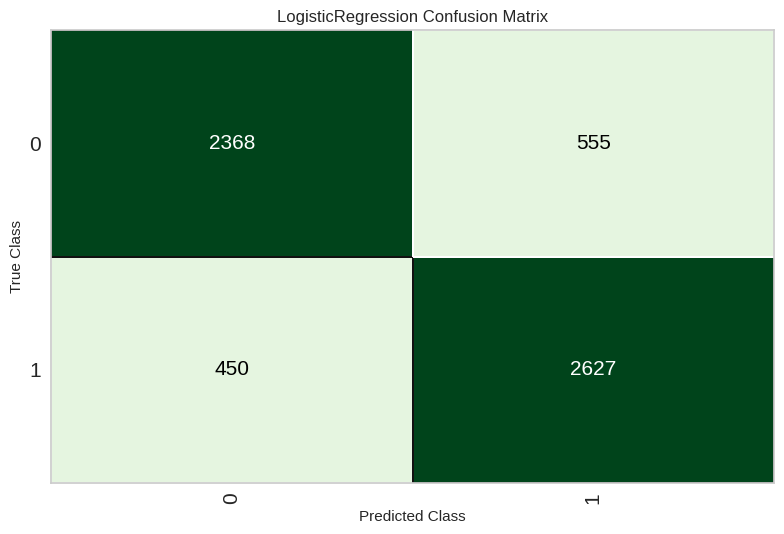

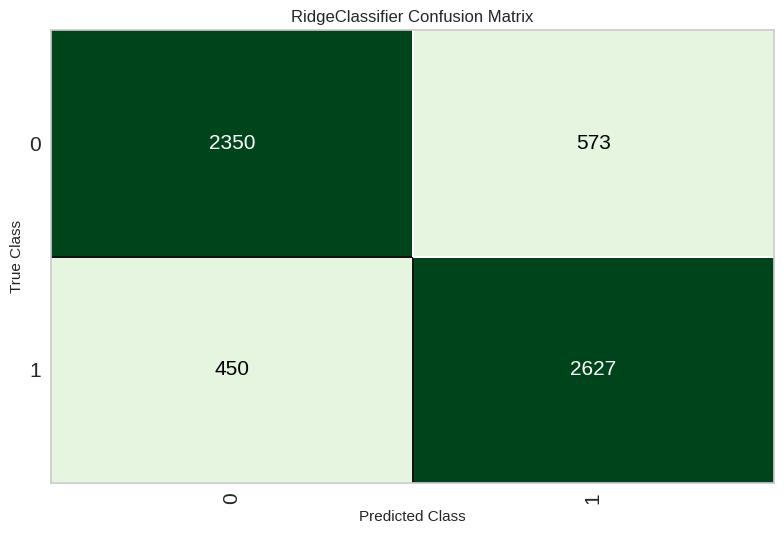

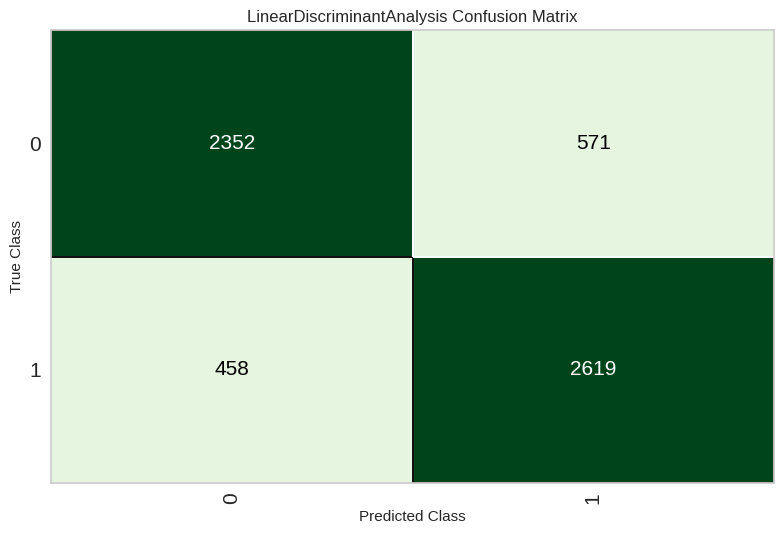

[None, None, None]

In [ ]:
# plot confusion matrix
[plot_model(i, plot = 'confusion_matrix') for i in top_3]

In [ ]:
tuned_top_3 = [tune_model(i) for i in top_3] 

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8071,0.8913,0.7994,0.8200,0.8096,0.6143,0.6145
1,0.8186,0.8941,0.8370,0.8144,0.8255,0.6366,0.6369
2,0.8157,0.8883,0.8189,0.8212,0.8201,0.6312,0.6312
3,0.8357,0.9042,0.8454,0.8361,0.8407,0.6711,0.6712
4,0.8071,0.8808,0.8050,0.8164,0.8107,0.6142,0.6142
5,0.8121,0.8892,0.8134,0.8191,0.8162,0.6241,0.6241
6,0.8029,0.8794,0.8036,0.8104,0.8070,0.6055,0.6056
7,0.8264,0.8954,0.8231,0.8359,0.8295,0.6528,0.6528
8,0.8121,0.8942,0.8245,0.8121,0.8182,0.6239,0.6240


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8057,0.0000,0.8050,0.8141,0.8095,0.6113,0.6113
1,0.8150,0.0000,0.8468,0.8032,0.8244,0.6292,0.6302
2,0.8143,0.0000,0.8245,0.8154,0.8199,0.6282,0.6283
3,0.8400,0.0000,0.8565,0.8356,0.8459,0.6796,0.6798
4,0.8064,0.0000,0.8134,0.8100,0.8117,0.6126,0.6126
5,0.8157,0.0000,0.8273,0.8159,0.8216,0.6310,0.6311
6,0.8057,0.0000,0.8231,0.8030,0.8129,0.6109,0.6111
7,0.8250,0.0000,0.8398,0.8226,0.8312,0.6496,0.6497
8,0.8129,0.0000,0.8343,0.8073,0.8205,0.6251,0.6255


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8064,0.8917,0.8064,0.8143,0.8104,0.6127,0.6127
1,0.8157,0.8935,0.8454,0.8050,0.8247,0.6307,0.6315
2,0.8136,0.8880,0.8245,0.8143,0.8194,0.6268,0.6268
3,0.8371,0.9053,0.8524,0.8338,0.8430,0.6739,0.6741
4,0.8050,0.8807,0.8120,0.8086,0.8103,0.6097,0.6097
5,0.8164,0.8910,0.8259,0.8179,0.8219,0.6325,0.6326
6,0.8050,0.8778,0.8217,0.8027,0.8121,0.6095,0.6097
7,0.8250,0.8954,0.8398,0.8226,0.8312,0.6496,0.6497
8,0.8136,0.8949,0.8343,0.8084,0.8211,0.6266,0.6269


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [ ]:
tuned_top_3

[LogisticRegression(C=2.833, class_weight='balanced', dual=False,
                    fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                    max_iter=1000, multi_class='auto', n_jobs=None, penalty='l2',
                    random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                    warm_start=False),
 RidgeClassifier(alpha=7.68, class_weight=None, copy_X=True, fit_intercept=True,
                 max_iter=None, positive=False, random_state=123, solver='auto',
                 tol=0.0001),
 LinearDiscriminantAnalysis(covariance_estimator=None, n_components=None,
                            priors=None, shrinkage=0.01, solver='eigen',
                            store_covariance=False, tol=0.0001)]

In [ ]:
tuned_pred = [predict_model(i, data=df_test_word_embed) for i in tuned_top_3]

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.8155,0.8852,0.8165,0.8221,0.8193,0.6308,0.6309


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Ridge Classifier,0.8102,0.8099,0.8233,0.8095,0.8164,0.6201,0.6202


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Linear Discriminant Analysis,0.8095,0.8850,0.8238,0.8080,0.8159,0.6186,0.6187
